# Application Selections
## Imports
Note that for some reason sometimes bs4 import has to be imported just before the function that uses it.

In [1]:
import requests
import json
import matplotlib.pyplot as plt
import bs4 as BeautifulSoup
from webdriver_manager.chrome import ChromeDriverManager
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options

## Getting the application names and github links

The plan is to look up the application names using the nvd api. To ensure that a cve is of that application, it needs to have a github link to the actual source code of the application in its references. The github link is provided in the website itself.

The general approach:
- take every application name and each href to specific project pages
- go to every these project pages and get the github link
- use it for the api search (next section)

In [3]:
# API endpoint
api_url = "https://services.nvd.nist.gov/rest/json/cves/2.0"

# List of keywords
typescript = [
    "grafana",
    "apache superset",
    "joplin",
    "n8n",
    "appsmith",
    "cal.com",
    "directus",
    "outline",
    "thingsboard",
    "peertube",
    "tinacms",
    "zettlr",
    "misskey",
    "growthbook",
    "vendure",
    "orchest",
    "boost note",
    "lightdash",
    "twake",
    "oxen-io"
]

keywordsTest = ["joplin", "n8n"]

This scrapes the website to get the application names and href

In [59]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options
from webdriver_manager.chrome import ChromeDriverManager
from bs4 import BeautifulSoup
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.keys import Keys

def scrape_website_with_selenium(url):
    # Set up the Chrome webdriver with Selenium
    options = Options()
    options.headless = True  # Set to False if you want to see the browser window

    driver = webdriver.Chrome(ChromeDriverManager().install())

    # Open the website in the browser
    driver.get(url)

    # Wait for some time to allow JavaScript to execute and render the content
    driver.implicitly_wait(10000)  # You might need to adjust the wait time based on the page's loading speed
    # load_more_button = driver.find_element(By.CLASS_NAME, 'load-more-btn')
    # if load_more_button:
    #     load_more_button.click()
    #     print("button clicked")
    # driver.implicitly_wait(100)  # You might need to adjust the wait time based on the page's loading speed    

    # Get the fully rendered page source
    page_source = driver.page_source

    # Close the browser
    driver.quit()

    # Parse the HTML content using BeautifulSoup
    soup = BeautifulSoup(page_source, 'html.parser')

    # Extract information from the HTML based on the provided structure
    cards = soup.find_all('div', class_='freelancer-card w-dyn-item')

    results = []

    for card in cards:
        # Extract the GitHub link
        link_element = card.find('a', href=True)
        if link_element:
            github_link = link_element['href']

            # Extract the element with class "freelancer-card-name"
            name_element = card.find('a', class_='freelancer-card-name')
            if name_element:
                element_text = name_element.get_text(strip=True)

                # Store the href and element_text as a tuple in the results array
                results.append((github_link, element_text))

    return results




In [ ]:
# Example usage:
website_url = "https://www.opensourcealternative.to/?lanugage=JavaScript"
results = scrape_website_with_selenium(website_url)

# Print the results
for result in results:
    print("GitHub Link:", result[0])
    print("Element Text:", result[1])
    print()

The code above is for javascript (as we were experimenting with different languages, finding out which one has the most cve), below, we change it to PHP, which at the end is used for the final dataset.

In [60]:
forPHPUrl = "https://www.opensourcealternative.to/?lanugage=PHP"
appAndHrefs = scrape_website_with_selenium(forPHPUrl)

In [68]:
print(len(appAndHrefs))
print(json.dumps(appAndHrefs, indent=1))

60
[
 [
  "/project/NextCloud",
  "NextCloud"
 ],
 [
  "/project/Matomo",
  "Matomo"
 ],
 [
  "/project/Cachet",
  "Cachet"
 ],
 [
  "/project/Bookstack",
  "Bookstack"
 ],
 [
  "/project/Firefly-III",
  "Firefly III"
 ],
 [
  "/project/Magento-",
  "Magento"
 ],
 [
  "/project/YOURLS",
  "YOURLS"
 ],
 [
  "/project/Wallabag",
  "Wallabag"
 ],
 [
  "/project/Bagisto",
  "Bagisto"
 ],
 [
  "/project/WooCommerce",
  "WooCommerce"
 ],
 [
  "/project/OwnCloud",
  "OwnCloud"
 ],
 [
  "/project/Kanboard",
  "Kanboard"
 ],
 [
  "/project/PrestaShop",
  "PrestaShop"
 ],
 [
  "/project/Sylius",
  "Sylius"
 ],
 [
  "/project/InvoiceNinja",
  "InvoiceNinja"
 ],
 [
  "/project/Opencart",
  "Opencart"
 ],
 [
  "/project/Akaunting",
  "Akaunting"
 ],
 [
  "/project/Mautic",
  "Mautic"
 ],
 [
  "/project/HumHub",
  "HumHub"
 ],
 [
  "/project/Flarum",
  "Flarum"
 ],
 [
  "/project/PrivateBin",
  "PrivateBin"
 ],
 [
  "/project/Pixelfed",
  "Pixelfed"
 ],
 [
  "/project/Moodle",
  "Moodle"
 ],
 [
  "/

In [11]:
print(len(results))

82


Below is saving the results, just in case. Some savings are done throughout the notebook

In [12]:
with open("javascript apps and project links in site", 'w', encoding='utf-8') as file:
    for result in results:
        file.write(f"project link in site: {result[0]}\n")
        file.write(f"app name: {result[1]}\n\n")

In [69]:
with open("phpAppsAndHrefs.txt", 'w', encoding='utf-8') as file:
    for app in appAndHrefs:
        file.write(f"project link in site: {app[0]}\n")
        file.write(f"app name: {app[1]}\n\n")

This is to read the file and collect the data back to an array of tuples.

In [20]:
import re
import json

def readHrefsFromTxt(filename):    
    with open(filename, 'r') as file:
        sample_text = file.read()
    # Define a regular expression pattern to extract GitHub links and element texts
    pattern = re.compile(r'project link in site: (.+)\napp name: (.+)\n')
    # Find all matches in the sample text
    matches = pattern.findall(sample_text)
    
    # Create a list to store the dictionaries for each element
    elements_list = []
    
    # Iterate through matches and create dictionaries
    for match in matches:
        href, appname = match
        element_dict = {'href': href, 'appname': appname}
        elements_list.append(element_dict)
    return elements_list


In [21]:
appnameAndHrefs = readHrefsFromTxt("jsappsHref.txt")
print(appnameAndHrefs)

[{'href': '/project/Atom', 'appname': 'Atom'}, {'href': '/project/Strapi', 'appname': 'Strapi'}, {'href': '/project/Hoppscotch', 'appname': 'Hoppscotch'}, {'href': '/project/Ghost', 'appname': 'Ghost'}, {'href': '/project/Uptime-Kuma', 'appname': 'Uptime Kuma'}, {'href': '/project/NocoDB', 'appname': 'NocoDB'}, {'href': '/project/Appwrite', 'appname': 'Appwrite'}, {'href': '/project/Rocket-Chat', 'appname': 'Rocket.Chat'}, {'href': '/project/Drawio', 'appname': 'Drawio'}, {'href': '/project/Insomnia-', 'appname': 'Insomnia'}, {'href': '/project/Tooljet', 'appname': 'Tooljet'}, {'href': '/project/Trilium-Notes', 'appname': 'Trilium Notes'}, {'href': '/project/Wiki-js', 'appname': 'Wiki.js'}, {'href': '/project/Vuepress', 'appname': 'Vuepress'}, {'href': '/project/Responsively', 'appname': 'Responsively'}, {'href': '/project/Medusa-Commerce', 'appname': 'Medusa Commerce'}, {'href': '/project/Jitsi', 'appname': 'Jitsi'}, {'href': '/project/Parse-server', 'appname': 'Parse-server'}, {'href

In [70]:
phpAppAndHrefs = readHrefsFromTxt("phpAppsAndHrefs.txt")

In [71]:
print(json.dumps(phpAppAndHrefs, indent=1))

[
 {
  "href": "/project/NextCloud",
  "appname": "NextCloud"
 },
 {
  "href": "/project/Matomo",
  "appname": "Matomo"
 },
 {
  "href": "/project/Cachet",
  "appname": "Cachet"
 },
 {
  "href": "/project/Bookstack",
  "appname": "Bookstack"
 },
 {
  "href": "/project/Firefly-III",
  "appname": "Firefly III"
 },
 {
  "href": "/project/Magento-",
  "appname": "Magento"
 },
 {
  "href": "/project/YOURLS",
  "appname": "YOURLS"
 },
 {
  "href": "/project/Wallabag",
  "appname": "Wallabag"
 },
 {
  "href": "/project/Bagisto",
  "appname": "Bagisto"
 },
 {
  "href": "/project/WooCommerce",
  "appname": "WooCommerce"
 },
 {
  "href": "/project/OwnCloud",
  "appname": "OwnCloud"
 },
 {
  "href": "/project/Kanboard",
  "appname": "Kanboard"
 },
 {
  "href": "/project/PrestaShop",
  "appname": "PrestaShop"
 },
 {
  "href": "/project/Sylius",
  "appname": "Sylius"
 },
 {
  "href": "/project/InvoiceNinja",
  "appname": "InvoiceNinja"
 },
 {
  "href": "/project/Opencart",
  "appname": "Opencart"
 

In [22]:
print(len(appnameAndHrefs))

82


This is actually getting the github links from the href of each app

In [23]:
import requests
from bs4 import BeautifulSoup

def get_github_links(element_list):
    githubList = []
    
    for element in element_list:
        full_url = f'https://www.opensourcealternative.to{element["href"]}'
        
        # Make a request to the target webpage
        response = requests.get(full_url)
        
        if response.status_code == 200:
            soup = BeautifulSoup(response.text, 'html.parser')
            
            # Find the div with class 'social-link-wrapper-copy'
            social_link_div = soup.find('div', class_='social-link-wrapper-copy')
            
            # Find the <a> with href containing 'github.com'
            github_link = social_link_div.find('a', href=re.compile(r'github\.com'))
            
            # Extract the href
            github_href = github_link['href'] if github_link else None
            
            # Update the dictionary with the GitHub link
            element['github_href'] = github_href
            githubList.append(element)
        else:
            print(f"Error: Unable to fetch {full_url}")
    
    return githubList

In [24]:
githubListJS = get_github_links(appnameAndHrefs)

In [72]:
githubListPhp = get_github_links(phpAppAndHrefs)

In [26]:
print(json.dumps(githubListJS, indent=1))

[
 {
  "href": "/project/Atom",
  "appname": "Atom",
  "github_href": "https://github.com/atom/atom"
 },
 {
  "href": "/project/Strapi",
  "appname": "Strapi",
  "github_href": "https://github.com/strapi/strapi"
 },
 {
  "href": "/project/Hoppscotch",
  "appname": "Hoppscotch",
  "github_href": "https://github.com/hoppscotch/hoppscotch"
 },
 {
  "href": "/project/Ghost",
  "appname": "Ghost",
  "github_href": "https://github.com/TryGhost/Ghost"
 },
 {
  "href": "/project/Uptime-Kuma",
  "appname": "Uptime Kuma",
  "github_href": "https://github.com/louislam/uptime-kuma"
 },
 {
  "href": "/project/NocoDB",
  "appname": "NocoDB",
  "github_href": "https://github.com/nocodb/nocodb"
 },
 {
  "href": "/project/Appwrite",
  "appname": "Appwrite",
  "github_href": "https://github.com/appwrite/appwrite"
 },
 {
  "href": "/project/Rocket-Chat",
  "appname": "Rocket.Chat",
  "github_href": "https://github.com/RocketChat/Rocket.Chat"
 },
 {
  "href": "/project/Drawio",
  "appname": "Drawio",
  "g

In [73]:
print(json.dumps(githubListPhp, indent=1))

[
 {
  "href": "/project/NextCloud",
  "appname": "NextCloud",
  "github_href": "https://github.com/nextcloud/server"
 },
 {
  "href": "/project/Matomo",
  "appname": "Matomo",
  "github_href": "https://github.com/Matomo-org/matomo"
 },
 {
  "href": "/project/Cachet",
  "appname": "Cachet",
  "github_href": "https://github.com/CachetHQ/Cachet"
 },
 {
  "href": "/project/Bookstack",
  "appname": "Bookstack",
  "github_href": "https://github.com/BookStackApp/BookStack"
 },
 {
  "href": "/project/Firefly-III",
  "appname": "Firefly III",
  "github_href": "https://github.com/firefly-iii/firefly-iii"
 },
 {
  "href": "/project/Magento-",
  "appname": "Magento",
  "github_href": "https://github.com/magento/magento2"
 },
 {
  "href": "/project/YOURLS",
  "appname": "YOURLS",
  "github_href": "https://github.com/YOURLS/YOURLS"
 },
 {
  "href": "/project/Wallabag",
  "appname": "Wallabag",
  "github_href": "https://github.com/wallabag/wallabag"
 },
 {
  "href": "/project/Bagisto",
  "appname": 

In [28]:
with open("jsappsWithGithubLinks.json", 'w', encoding='utf-8') as json_file:
    json.dump(githubListJS, json_file, indent=1)

In [74]:
with open("phpAppsWithGithubLinks.json", 'w', encoding='utf-8') as json_file:
    json.dump(githubListPhp, json_file, indent=1)

## Querying CVE through the API

The querying takes into account several things:
- for each cve of each application, it checks if it has github links, if it does, it checks if any of the link corresponds to the one of the application
- it also checks if these github links contains the keyword "pull" or "commit".
- The github links that do not contain the aforementioned keywords are also stored in a list, can be manually checked.
- At the end, we have two lists, a list containing cve of every app that contains pull/commmit, and another list that contains github but not pull/commit

In [32]:
import requests

def takeCVE(applications):
    github_vulns_with_keywords = []
    github_vulns_without_keywords = []
    api_url = "https://services.nvd.nist.gov/rest/json/cves/2.0"
    for app_info in applications:
        appname = app_info["appname"]
        github_href = app_info["github_href"]
        github_keywords = ['commit', 'pull']

        # Replace spaces with %20 in the appname for the keywordSearch parameter
        keyword_search = appname.replace(' ', '%20')
        
        # Parameters for the API request
        params = {
            'keywordSearch': keyword_search,
            'keywordExactMatch': ''
        }

        # Make the API request
        response = requests.get(api_url, params=params)

        # Check if the request was successful (status code 200)
        if response.status_code == 200:
            # Parse the JSON response
            json_data = response.json()

            for vulnerability in json_data['vulnerabilities']:
                references = vulnerability['cve']['references']
                github_references = [ref['url'] for ref in references if 'github.com' in ref['url']]

                contains_github_href = any(github_href in ref for ref in github_references)
                contains_keywords = any(keyword in ref.lower() for ref in github_references for keyword in github_keywords)

                if contains_github_href and contains_keywords:
                    github_vulns_with_keywords.append({
                        'app': appname,
                        'cve_id': vulnerability['cve']['id'],
                        'references': github_references,
                        'original_vuln': vulnerability
                    })
                elif contains_github_href:
                    github_vulns_without_keywords.append({
                        'app': appname,
                        'cve_id': vulnerability['cve']['id'],
                        'references': github_references,
                        'original_vuln': vulnerability
                    })
        else:
            # Print an error message if the request was not successful
            print(f"Error for '{appname}': {response.status_code}")

    return github_vulns_with_keywords, github_vulns_without_keywords


In [33]:
keywordsTest = githubListJS[:5]
#print(json.dumps(keywordsTest, indent=1))
testListWithKeywords, testListWO = takeCVE(keywordsTest)

In [6]:
typeScriptCVE, typeScriptCVENeedManualCheck = takeCVE(typescript)

In [38]:
jsCVEs, jsCVEsNeedManualCheck = takeCVE(githubListJS)

In [75]:
phpCVEs, phpCVEsNeedManualCheck = takeCVE(githubListPhp)

In [34]:
def print_json_without_original_vuln(json_data):
    for element in json_data:
        # Create a new dictionary without the 'original_vuln' property
        filtered_element = {key: value for key, value in element.items() if key != 'original_vuln'}
        
        # Print the filtered element in a pretty format
        print(json.dumps(filtered_element, indent=2))

def save_to_json_file(data, filename):
    with open(filename, 'w') as json_file:
        json.dump(data, json_file, indent=2)

In [37]:
print(len(testListWithKeywords))
#print_json_without_original_vuln(testListWithKeywords)
print(len(testListWO))
#print_json_without_original_vuln(testListWO)

14
17
{
  "app": "Strapi",
  "cve_id": "CVE-2021-28128",
  "references": [
    "https://github.com/strapi/strapi/releases"
  ]
}
{
  "app": "Strapi",
  "cve_id": "CVE-2022-27263",
  "references": [
    "https://github.com/strapi/strapi"
  ]
}
{
  "app": "Strapi",
  "cve_id": "CVE-2022-29894",
  "references": [
    "https://github.com/strapi/strapi"
  ]
}
{
  "app": "Strapi",
  "cve_id": "CVE-2022-32114",
  "references": [
    "https://github.com/bypazs/strapi",
    "https://github.com/strapi/strapi/blob/d9277d616b4478a3839e79e47330a4aaf167a2f1/packages/core/content-type-builder/admin/src/components/AllowedTypesSelect/index.js#L14",
    "https://github.com/strapi/strapi/blob/d9277d616b4478a3839e79e47330a4aaf167a2f1/packages/core/upload/admin/src/components/MediaLibraryInput/index.js#L33"
  ]
}
{
  "app": "Strapi",
  "cve_id": "CVE-2022-31367",
  "references": [
    "https://github.com/kos0ng/CVEs/tree/main/CVE-2022-31367",
    "https://github.com/strapi/strapi/releases/tag/v3.6.10",
   

In [19]:
print(len(typeScriptCVE))
print_json_without_original_vuln(typeScriptCVENeedManualCheck)
print(len(typeScriptCVENeedManualCheck))

85
{
  "app": "grafana",
  "cve_id": "CVE-2018-1000816",
  "references": [
    "https://github.com/grafana/grafana/issues/13667"
  ]
}
{
  "app": "grafana",
  "cve_id": "CVE-2019-13068",
  "references": [
    "https://github.com/grafana/grafana/issues/17718",
    "https://github.com/grafana/grafana/releases/tag/v6.2.5"
  ]
}
{
  "app": "grafana",
  "cve_id": "CVE-2019-15043",
  "references": [
    "https://github.com/grafana/grafana/releases"
  ]
}
{
  "app": "grafana",
  "cve_id": "CVE-2020-12458",
  "references": [
    "https://github.com/grafana/grafana/issues/8283"
  ]
}
{
  "app": "grafana",
  "cve_id": "CVE-2020-12459",
  "references": [
    "https://github.com/grafana/grafana/issues/8283"
  ]
}
{
  "app": "grafana",
  "cve_id": "CVE-2020-13429",
  "references": [
    "https://github.com/grafana/piechart-panel/issues/218",
    "https://github.com/grafana/piechart-panel/releases/tag/v1.5.0"
  ]
}
{
  "app": "grafana",
  "cve_id": "CVE-2020-11110",
  "references": [
    "https://gi

In [77]:
print(len(phpCVEs))
print_json_without_original_vuln(phpCVEs)
print(len(phpCVEsNeedManualCheck))

524
{
  "app": "NextCloud",
  "cve_id": "CVE-2016-9459",
  "references": [
    "https://github.com/nextcloud/server/commit/94975af6db1551c2d23136c2ea22866a5b416070",
    "https://github.com/owncloud/core/commit/044ee072a647636b1a17c89265c7233b35371335",
    "https://github.com/owncloud/core/commit/b7fa2c5dc945b40bc6ed0a9a0e47c282ebf043e1",
    "https://github.com/owncloud/core/commit/efa35d621dc7ff975468e636a5d1c153511296dc"
  ]
}
{
  "app": "NextCloud",
  "cve_id": "CVE-2016-9460",
  "references": [
    "https://github.com/nextcloud/server/commit/2da43e3751576bbc838f238a09955c4dcdebee8e",
    "https://github.com/nextcloud/server/commit/8aa0832bd449c44ec300da4189bd8ed4e036140c",
    "https://github.com/nextcloud/server/commit/dea8e29289a1b99d5e889627c2e377887f4f2983",
    "https://github.com/owncloud/core/commit/c92c234059f8b1dc7d53122985ec0d398895a2cf"
  ]
}
{
  "app": "NextCloud",
  "cve_id": "CVE-2016-9461",
  "references": [
    "https://github.com/nextcloud/server/commit/349140026

In [40]:
print(len(jsCVEs))
print_json_without_original_vuln(jsCVEs)
print(len(jsCVEsNeedManualCheck))

127
{
  "app": "Strapi",
  "cve_id": "CVE-2019-18818",
  "references": [
    "https://github.com/strapi/strapi/pull/4443",
    "https://github.com/strapi/strapi/releases/tag/v3.0.0-beta.17.5"
  ]
}
{
  "app": "Strapi",
  "cve_id": "CVE-2019-19609",
  "references": [
    "https://github.com/strapi/strapi/pull/4636"
  ]
}
{
  "app": "Strapi",
  "cve_id": "CVE-2020-13961",
  "references": [
    "https://github.com/strapi/strapi/pull/6599",
    "https://github.com/strapi/strapi/releases/tag/v3.0.2"
  ]
}
{
  "app": "Strapi",
  "cve_id": "CVE-2020-27664",
  "references": [
    "https://github.com/strapi/strapi/pull/8442",
    "https://github.com/strapi/strapi/releases/tag/v3.2.5"
  ]
}
{
  "app": "Strapi",
  "cve_id": "CVE-2020-27665",
  "references": [
    "https://github.com/strapi/strapi/pull/8439",
    "https://github.com/strapi/strapi/releases/tag/v3.2.5"
  ]
}
{
  "app": "Strapi",
  "cve_id": "CVE-2020-27666",
  "references": [
    "https://github.com/strapi/strapi/pull/8440",
    "ht

In [12]:
save_to_json_file(typeScriptCVE, "typescript_cve.json")
save_to_json_file(typeScriptCVENeedManualCheck, "typescript_cve_manual_check.json")

In [41]:
save_to_json_file(jsCVEs, "jsCVEs.json")
save_to_json_file(jsCVEsNeedManualCheck, "jsCVEsNeedManualCheck.json")

In [78]:
save_to_json_file(phpCVEs, "phpCVEs.json")
save_to_json_file(phpCVEsNeedManualCheck, "phpCVEsNeedManualCheck.json")

## Some visualizations

In [44]:
import matplotlib.pyplot as plt
def create_app_count_bar_chart(json_data):
    # Count the occurrences of each app
    app_count = {}
    for element in json_data:
        app = element.get("app")
        app_count[app] = app_count.get(app, 0) + 1

    # Extract data for plotting
    apps = list(app_count.keys())
    counts = list(app_count.values())

    # Create a bar chart
    plt.bar(apps, counts, color='blue')
    plt.xlabel('App')
    plt.ylabel('Count')
    plt.title('Number of Elements for Each App')
    plt.show()

def create_app_count_pie_chart(json_data):
    # Count the occurrences of each app
    app_count = {}
    for element in json_data:
        app = element.get("app")
        app_count[app] = app_count.get(app, 0) + 1

    # Extract data for plotting
    apps = list(app_count.keys())
    counts = list(app_count.values())

    # Create a pie chart
    plt.pie(counts, labels=apps, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.title('Distribution of Elements Across Apps')
    plt.show()

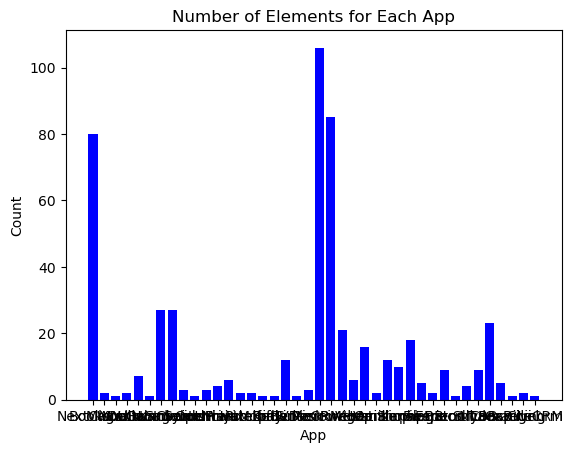

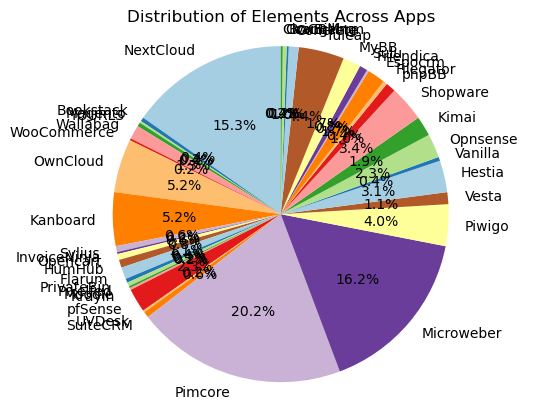

In [79]:
create_app_count_bar_chart(phpCVEs)
create_app_count_pie_chart(phpCVEs)